In [1]:
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.table import Table
import numpy as np

In [2]:
control = Table.read('./stat/control_stat_5_6_all_info.fits')
jelly = Table.read('./stat/stat_sfr_5_6_all_info.fits')
control_hb = Table.read('./stat/control_stat_5_7_hb.fits')


con_con = Table.read('./data/con.dat',format='ascii')
con1 = Table.read('./data/con1.dat',format='ascii')

# area_mask = control['area_used']/control['area_re']>0.9
# control=control[area_mask]
# ba_mask = control['NSA_SERSIC_BA']>=0.4
# control=control[ba_mask]
# control_hb = control_hb[mask]

(array([0.00784314, 0.10196078, 0.22745098, 0.88627451, 2.35294118,
        1.98431373, 0.7372549 , 0.23529412, 0.09411765, 0.05882353]),
 array([-0.75, -0.6 , -0.45, -0.3 , -0.15,  0.  ,  0.15,  0.3 ,  0.45,
         0.6 ,  0.7 ]),
 <BarContainer object of 10 artists>)

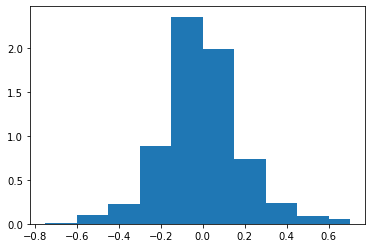

In [3]:
bins = [-0.75, -0.6, -0.45, -0.3, -.15, 0, 0.15, 0.3, 0.45, 0.6, 0.7]
plt.hist((control['l_sum'] - control['t_sum']) /
         (control['l_sum'] + control['t_sum']),
         bins=bins,
         density=True)

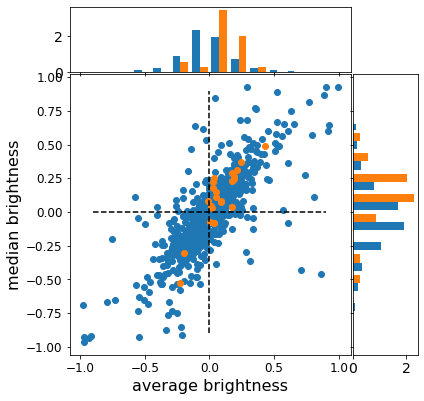

In [4]:

plt.rcParams['font.size'] = 16
# definitions for the axes
left, width = 0.15, 0.65
bottom, height = 0.15, 0.65
spacing = 0.005
rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom + height + spacing, width, 0.15]
rect_histy = [left + width + spacing, bottom, 0.15, height]

# start with a square Figure
fig = plt.figure(figsize=(6, 6))

ax = fig.add_axes(rect_scatter)
ax_histx = fig.add_axes(rect_histx, sharex=ax)
ax_histy = fig.add_axes(rect_histy, sharey=ax)

x = (jelly['l_sum'] - jelly['t_sum']) / (jelly['l_sum'] + jelly['t_sum'])
y = (jelly['l_median'] - jelly['t_median']) / (jelly['l_median'] +
                                               jelly['t_median'])
i = (control['l_sum'] - control['t_sum']) / (control['l_sum'] +
                                             control['t_sum'])
j = (control['l_median'] - control['t_median']) / (control['l_median'] +
                                                   control['t_median'])

ax.scatter(i, j, label='Control')
ax.scatter(x, y, label='Jelly')
#ax.legend()
ax_histx.tick_params(axis="x", labelbottom=False)
ax_histy.tick_params(axis="y", labelleft=False)
ax_histx.tick_params(axis="y", labelsize=14)
ax_histy.tick_params(axis="x", labelsize=14)

ax.tick_params(labelsize=12)
ax.set_xlabel('average brightness')
ax.set_ylabel('median brightness')

ax_histx.hist([i, x], bins=bins, density=True)
ax_histy.hist([j, y], bins=bins, orientation='horizontal', density=True)
ax.vlines(0, -0.9, 0.9, colors="black", linestyles="dashed")
ax.hlines(0, -0.9, 0.9, colors="black", linestyles="dashed")
#fig.savefig('scatter.svg')

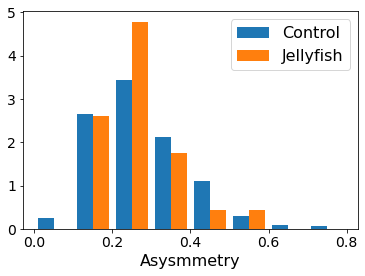

In [5]:
plt.hist([control['asy'], jelly['asy']],
         #cumulative=True,
         #histtype='step',
         bins=[0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8],
         density=True,
         label=['Control', 'Jellyfish'])
ax = plt.gca()
ax.set_xlabel('Asysmmetry')
ax.legend()
ax.tick_params(labelsize=14)

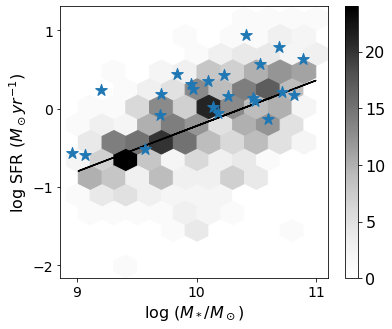

0.5825035853077771*M + -6.046514252368173


In [6]:
mask = control['area_used']/control['area_re']>0.9
control_area = control[mask]
x = control_area['log_M']
y = np.log10(control_area['sfr_re'])

i = jelly['log_M']
j = np.log10(jelly['sfr_re'])

fig = plt.gcf()
fig.set_figwidth(6)
fig.set_figheight(5)

ax = plt.gca()
# plt.scatter(x,y)
hexb = ax.hexbin(x, y, gridsize=(10,7), cmap=plt.cm.Greys, edgecolors='face')
fig.colorbar(hexb, ax=ax)
m,c = np.polyfit(x,y,1)
ax.plot(x, m*x + c, c='black')

ax.scatter(i,j,marker='*',s=150,zorder=100)

from matplotlib.pyplot import MultipleLocator
x_major_locator=MultipleLocator(1)
y_major_locator=MultipleLocator(1)
ax.xaxis.set_major_locator(x_major_locator)
ax.yaxis.set_major_locator(y_major_locator)

plt.rcParams['font.size'] = 16
ax.tick_params(labelsize=14)
ax.set_xlabel('log $(M_*/M_\odot)$')
ax.set_ylabel('log SFR $(M_\odot yr^{-1})$')

plt.show()

print(str(m)+'*M + '+str(c))

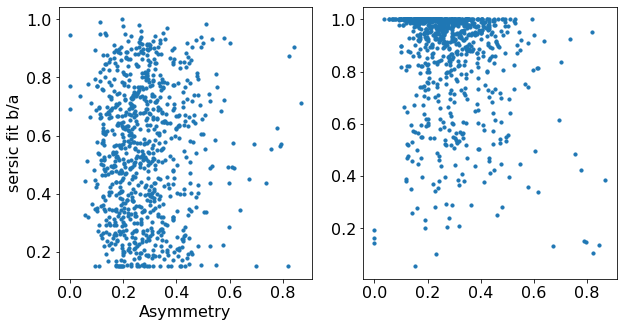

In [51]:
fig, axs = plt.subplots(1,2)
fig.set_figwidth(10)
fig.set_figheight(5)

axs[0].set_xlabel('Asymmetry')
axs[0].set_ylabel('sersic fit b/a')


axs[0].scatter(control['asy'],control['NSA_SERSIC_BA'],s=10)

axs[1].scatter(control['asy'],control['area_used']/control['area_re'],s=10)
